### This part of the code we prepare the dataset for training

# Below part of the code 
## We load the data and using pandas library loads the close values of the excel sheet.

In [1]:
import pandas as pd
dataset=pd.read_csv('SPY.csv').values
close_value=dataset[:,4]
close_value=close_value.reshape(-1,1)
print(close_value[:5])
print(close_value.shape)

[[43.9375]
 [44.25]
 [44.34375]
 [44.8125]
 [45.0]]
(7558, 1)


# Below part of the code
## We plot loaded data to get a clear understanding how open values changed with the date.

In [2]:
from matplotlib import pyplot as plt

plt.plot(close_value)
plt.xlabel('Date')
plt.xlabel('Close Value/$')
plt.show()

<Figure size 640x480 with 1 Axes>

## Below part of the code
### We convert the values to a value between 0-1 to make the processing easier

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled_close_value=scaler.fit_transform(close_value)
print(close_value[:5])
print(scaled_close_value[:5])

[[43.9375]
 [44.25]
 [44.34375]
 [44.8125]
 [45.0]]
[[0.00122322]
 [0.00194276]
 [0.00215863]
 [0.00323794]
 [0.00366967]]


In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled_close_value=scaler.fit_transform(close_value)
print(close_value[:5])
print(scaled_close_value[:5])

[[43.9375]
 [44.25]
 [44.34375]
 [44.8125]
 [45.0]]
[[0.00122322]
 [0.00194276]
 [0.00215863]
 [0.00323794]
 [0.00366967]]


## Below part of the code
### We divide the values into data and target here we give 50 days as data 51 st date as the target, which means during this process we train the neural network to analyze 50 days and tells it to predict the 51st day.You can change it as you wish if you want

In [5]:
data=[]
target=[]

for i in range(50,close_value.shape[0]):
    data.append(scaled_close_value[i-50:i])
    target.append(scaled_close_value[i])
    

# Below part of the code
## we convert the appended data and target to numpy array for further training 

In [6]:
import numpy as np
data_np=np.array(data)
target_np=np.array(target)

print(data_np.shape)
print(target_np.shape)

(7508, 50, 1)
(7508, 1)


## Below part of the code
### we save the numpy arrays as data_SPY_close_value & target_SPY_close_value

In [7]:
np.save('data_SPY_close_value',data)
np.save('target_SPY_close_value',target)

### In this part of the code we train the nueral network using processed data

# Below part of the code 
### We load the saved numpy arrays

In [8]:
import numpy as np
data=np.load('data_SPY_close_value.npy')
target=np.load('target_SPY_close_value.npy')

## Below part of the code
### We divide the data into two parts mainly as train_data,train_target,test_data,test_target, Usually we give 80% for training and 20% for testing it can be changed accordingly.

In [9]:
train_data=data[:5000]
train_target=target[:5000]

test_data=data[5000:]
test_target=target[5000:]

## Below part of the code
### We plot the train target and test target graphs

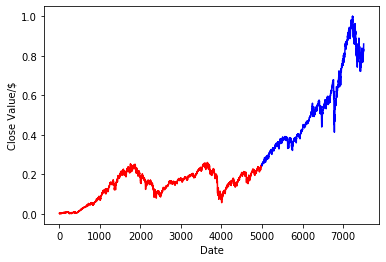

In [11]:
from matplotlib import pyplot as plt

#test_x_range is an array of values between 5000-7045
test_x_range=np.arange(5000,7508,1)

plt.plot(train_target,'r',label='train')
plt.plot(test_x_range,test_target,'b',label='test')
plt.xlabel('Date')
plt.ylabel('Close Value/$')
plt.show()


## Below part of the code
### Actually this is the core of the code which is the neural network architecture this can be subjected to changes to get the mximum accuaracy

In [12]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout

model=Sequential()

model.add(LSTM(units=96,return_sequences=True,input_shape=(data.shape[1:])))
model.add(Dropout(0.5))

model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.5))

model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.5))

model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.5))

model.add(LSTM(units=96,return_sequences=False))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='linear'))

model.compile(loss='mse',optimizer='adam')#,metrics=['accuracy']

Using TensorFlow backend.


## Below part of the code
### We train the neural network

In [19]:
history=model.fit(train_data,train_target,epochs=10,validation_split=0.1)

Train on 4500 samples, validate on 500 samples
Epoch 1/10
4500/4500 [==============================] - 20s 4ms/step - loss: 1.5953e-04 - val_loss: 4.3652e-05
Epoch 2/10
4500/4500 [==============================] - 22s 5ms/step - loss: 1.4609e-04 - val_loss: 5.2957e-05
Epoch 3/10
4500/4500 [==============================] - 22s 5ms/step - loss: 1.4295e-04 - val_loss: 4.5760e-05
Epoch 4/10
4500/4500 [==============================] - 21s 5ms/step - loss: 1.5734e-04 - val_loss: 8.6969e-05
Epoch 5/10
4500/4500 [==============================] - 23s 5ms/step - loss: 1.7354e-04 - val_loss: 7.2365e-05
Epoch 6/10
4500/4500 [==============================] - 22s 5ms/step - loss: 1.4062e-04 - val_loss: 3.8065e-05
Epoch 7/10
4500/4500 [==============================] - 23s 5ms/step - loss: 1.5364e-04 - val_loss: 5.2123e-05
Epoch 8/10
4500/4500 [==============================] - 23s 5ms/step - loss: 1.2665e-04 - val_loss: 1.0852e-04
Epoch 9/10
4500/4500 [==============================] - 23s 5ms/s

# The value loss and training loss is done

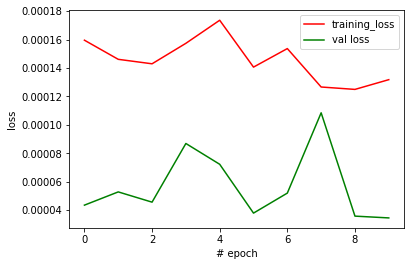

In [20]:
plt.plot(history.history['loss'],'r',label='training_loss')
plt.plot(history.history['val_loss'],'g',label='val loss')
plt.xlabel('# epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

# The R2 score is calculated of the model

In [21]:
result=model.predict(test_data)

from sklearn.metrics import r2_score

r2=r2_score(test_target,result)*100
print('r2 score:',r2)

r2 score: 88.19749065690482


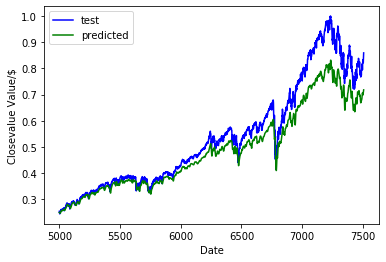

In [22]:

#test_x_range is an array of values between 5000-7508
test_x_range=np.arange(5000,7508,1)

#plt.plot(train_target,'r',label='train')
plt.plot(test_x_range,test_target,'b',label='test')
plt.plot(test_x_range,result,'g',label='predicted')

plt.xlabel('Date')
plt.ylabel('Closevalue Value/$')
plt.legend()
plt.show()

# The trained model is saved

In [15]:
model.save('SPY_Close.h5')